In [ ]:
import pandas as pd #Use to import pandas
from google.colab import files #Use to import the file into google Colab drive
import io #Use to import io, which opens the file from the Colab drive
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

# Now use the below code to read the csv in pandas' dataframe
height = pd.read_csv('HEIGHT-DATA.csv', header = None)


#retrieves and converts the dataframe to a numpy array
x_train = height.iloc[:, :-1]
y_train = height.iloc[:, [-1]]

array_train = x_train.to_numpy()
array_targets = y_train.to_numpy()
array_targets = array_targets.ravel()

X_train = array_train;

#Adding a column of 1s to count for the bias
X_train = np.c_[np.ones((array_train.shape[0], 1)), array_train]


[-0.12227684  1.0277953 ]
[-6.32582058]


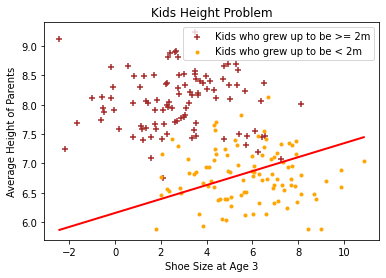

In [ ]:
#class labels
dict_class_weight = {1: 17, 0: 1}

#train a linear SVM classifier for the height prediction problem with default class weight
#clf = LinearSVC(class_weight = None, max_iter = 100000)

clf = LinearSVC(class_weight= dict_class_weight,  max_iter=100000)
clf.fit(array_train, array_targets)

weights = clf.coef_[0]
intercept = clf.intercept_

print(weights)
print(intercept)

#plotting the graph with seperating line
fig, ax = plt.subplots()  
positives = np.where(array_targets == 1)
negatives = np.where(array_targets == 0)

ax.scatter(array_train[positives, 0], array_train[positives, 1], marker="+", c='brown')
ax.scatter(array_train[negatives, 0], array_train[negatives, 1], marker=".", c='orange', linewidth=1)

plt.legend(["Kids who grew up to be >= 2m", "Kids who grew up to be < 2m"])\

x_axis = np.array([min(X_train[:, 1]), max(X_train[:, 1])])
y_axis = (-1/weights[1])*(weights[0]*x_axis+intercept) 
ax.plot(x_axis, y_axis, linewidth=2, c="red")

plt.title("Kids Height Problem")
plt.xlabel("Shoe Size at Age 3")
plt.ylabel("Average Height of Parents")
plt.show()


The seperating line we found in HW3 is different from HW2 because in Assignment 3 we're trying to maximize the margin between the seperating line and the 2 classes, compared to HW2 where we were minimizing the loss function. 

weights: [-0.12227587  1.0277947 ]
bias: [-6.32582078]

Class_weight: {1: 17, 0: 1}